In [ ]:
from google.colab import files

print(" Please upload dataset")
uploaded = files.upload()


 Please upload dataset


Saving Lab Session Data.xlsx to Lab Session Data (1).xlsx


In [ ]:
file_path = list(uploaded.keys())[0]
print("Dataset path set:", file_path)

Dataset path set: Lab Session Data (1).xlsx


--- A1: Purchase Data ---
Rank of Feature Matrix: 3
Cost of Products: Candy: 1.00, Mango: 55.00, Milk: 18.00

--- A2: Classifier ---
Classifier trained. Sample predictions: ['RICH' 'RICH' 'RICH' 'POOR' 'RICH'] 

--- A3: IRCTC Stock Analysis ---
Mean (Manual): 1560.66 | Time: 0.000028s
Mean (Numpy): 1560.66 | Time: 0.000011s
Probability of making a loss: 0.4980
Conditional Probability of Profit given Wednesday: 0.4200



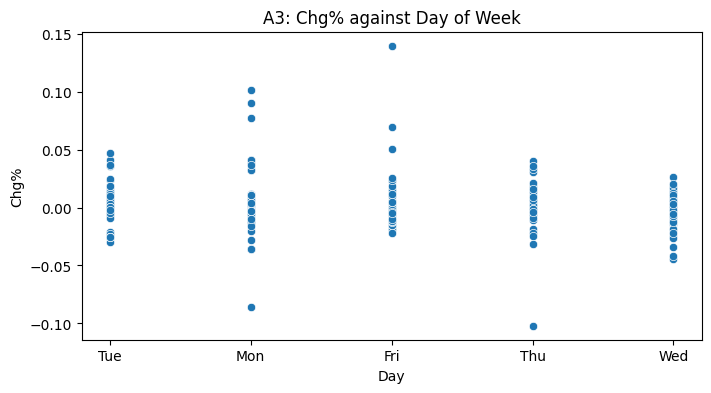

--- A4-A9: Thyroid Data Processing ---
A5: Jaccard Coefficient: 0.0000, SMC: 1.0000
A6: Cosine Similarity (Numeric Features): 0.9946


/tmp/ipython-input-3619445290.py:127: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_df[col] = pd.to_numeric(thyroid_df[col].replace('?', np.nan))
/tmp/ipython-input-3619445290.py:135: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bin_df = thyroid_df[binary_cols].applymap(lambda x: 1 if x == 't' else 0)


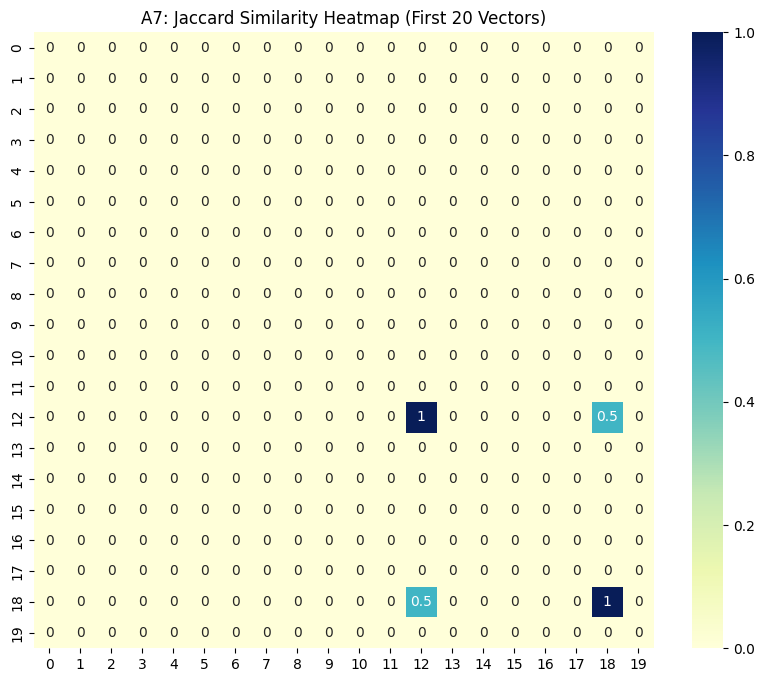

A9: Normalization completed for numeric variables.


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



def calculate_mean_manual(data):
    """Calculates mean without external packages."""
    return sum(data) / len(data)

def calculate_variance_manual(data):
    """Calculates variance without external packages."""
    m = calculate_mean_manual(data)
    return sum((x - m)**2 for x in data) / len(data)

def calculate_similarity(v1, v2):
    """Calculates Jaccard and Simple Matching Coefficients for binary vectors."""
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    f10 = np.sum((v1 == 1) & (v2 == 0))

    jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0
    smc = (f11 + f00) / (f11 + f00 + f01 + f10)
    return jc, smc

def cosine_similarity_manual(v1, v2):
    """Calculates Cosine Similarity between two vectors."""
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2) if (norm_v1 * norm_v2) != 0 else 0

# =============================================================================
# MAIN PROGRAM
# =============================================================================

def main():
    # --- Load Datasets ---
    # The error was caused by trying to read CSV files when an Excel file was uploaded.
    # We need to use pd.read_excel and specify the sheet names.

    # The 'file_path' variable from the previous cell contains the name of the uploaded Excel file.

    try:
        purchase_df = pd.read_excel(file_path, sheet_name='Purchase data')
        irctc_df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
        thyroid_df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
    except Exception as e:
        print(f"Error loading Excel sheets: {e}")
        print(f"Please ensure the uploaded file '{file_path}' is an Excel file and contains sheets named 'Purchase data', 'IRCTC Stock Price', and 'thyroid0387_UCI'.")
        return

    # -------------------------------------------------------------------------
    # A1: Purchase Data Analysis
    # -------------------------------------------------------------------------
    print("--- A1: Purchase Data ---")
    X = purchase_df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = purchase_df['Payment (Rs)'].values

    # Thinking: Dimensionality is 3 (3 features), Vectors: 10 (10 rows)
    rank_X = np.linalg.matrix_rank(X)
    X_pinv = np.linalg.pinv(X)
    model_vector = X_pinv @ y

    print(f"Rank of Feature Matrix: {rank_X}")
    print(f"Cost of Products: Candy: {model_vector[0]:.2f}, Mango: {model_vector[1]:.2f}, Milk: {model_vector[2]:.2f}\n")

    # -------------------------------------------------------------------------
    # A2: RICH/POOR Classifier
    # -------------------------------------------------------------------------
    print("--- A2: Classifier ---")
    purchase_df['Status'] = purchase_df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
    le = LabelEncoder()
    y_encoded = le.fit_transform(purchase_df['Status'])

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y_encoded)
    print("Classifier trained. Sample predictions:", le.inverse_transform(knn.predict(X[:5])), "\n")

    # -------------------------------------------------------------------------
    # A3: IRCTC Stock Price
    # -------------------------------------------------------------------------
    print("--- A3: IRCTC Stock Analysis ---")
    prices = irctc_df['Price'].values

    # Comparison of manual vs numpy
    start = time.time()
    for _ in range(10): calculate_mean_manual(prices)
    time_manual = (time.time() - start) / 10

    start = time.time()
    for _ in range(10): np.mean(prices)
    time_numpy = (time.time() - start) / 10

    print(f"Mean (Manual): {calculate_mean_manual(prices):.2f} | Time: {time_manual:.6f}s")
    print(f"Mean (Numpy): {np.mean(prices):.2f} | Time: {time_numpy:.6f}s")

    # Probability Calculations
    prob_loss = len(irctc_df[irctc_df['Chg%'] < 0]) / len(irctc_df)
    wed_df = irctc_df[irctc_df['Day'] == 'Wed']
    cond_prob_profit_wed = len(wed_df[wed_df['Chg%'] > 0]) / len(wed_df)

    print(f"Probability of making a loss: {prob_loss:.4f}")
    print(f"Conditional Probability of Profit given Wednesday: {cond_prob_profit_wed:.4f}\n")

    # Scatter Plot
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='Day', y='Chg%', data=irctc_df)
    plt.title("A3: Chg% against Day of Week")
    plt.show()

    # -------------------------------------------------------------------------
    # A4 - A9: Thyroid Data Exploration & Similarity
    # -------------------------------------------------------------------------
    print("--- A4-A9: Thyroid Data Processing ---")

    # Pre-cleaning: Convert '?' to NaN and numeric
    numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
    for col in numeric_cols:
        thyroid_df[col] = pd.to_numeric(thyroid_df[col].replace('?', np.nan))

    # A8: Data Imputation (Median for numeric, Mode for categorical)
    for col in numeric_cols:
        thyroid_df[col] = thyroid_df[col].fillna(thyroid_df[col].median())

    # A5: Jaccard and SMC (Binary attributes)
    binary_cols = ['on thyroxine', 'query on thyroxine', 'sick', 'pregnant', 'thyroid surgery']
    bin_df = thyroid_df[binary_cols].applymap(lambda x: 1 if x == 't' else 0)
    jc, smc = calculate_similarity(bin_df.iloc[0].values, bin_df.iloc[1].values)
    print(f"A5: Jaccard Coefficient: {jc:.4f}, SMC: {smc:.4f}")

    # A6: Cosine Similarity
    # Exclude Record ID and take encoded numeric vectors
    obs1 = thyroid_df.iloc[0][numeric_cols].values
    obs2 = thyroid_df.iloc[1][numeric_cols].values
    cos_sim = cosine_similarity_manual(obs1, obs2)
    print(f"A6: Cosine Similarity (Numeric Features): {cos_sim:.4f}")

    # A7: Heatmap for first 20 vectors (using JC)
    subset_20 = bin_df.head(20).values
    jc_matrix = np.array([[calculate_similarity(u, v)[0] for v in subset_20] for u in subset_20])
    plt.figure(figsize=(10, 8))
    sns.heatmap(jc_matrix, annot=True, cmap="YlGnBu")
    plt.title("A7: Jaccard Similarity Heatmap (First 20 Vectors)")
    plt.show()

    # A9: Normalization
    scaler = MinMaxScaler()
    thyroid_df[numeric_cols] = scaler.fit_transform(thyroid_df[numeric_cols])
    print("A9: Normalization completed for numeric variables.")

if __name__ == "__main__":
    main()

In [ ]:
!pip install openpyxl seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
def load_purchase_data():
    df = pd.read_excel(file_path, sheet_name="Purchase data")
    X = df[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]].values
    y = df["Payment (Rs)"].values.reshape(-1,1)
    return X, y

def calculate_rank(X):
    return np.linalg.matrix_rank(X)

def calculate_cost(X, y):
    return np.linalg.pinv(X).dot(y)

X, y = load_purchase_data()

print("Shape of X:", X.shape)
print("Number of vectors:", X.shape[0])
print("Rank of matrix:", calculate_rank(X))
print("Cost of products:\n", calculate_cost(X, y))


Shape of X: (10, 3)
Number of vectors: 10
Rank of matrix: 3
Cost of products:
 [[ 1.]
 [55.]
 [18.]]


In [ ]:
def prepare_classification_data():
    df = pd.read_excel(file_path, sheet_name="Purchase data")
    df["Label"] = df["Payment (Rs)"].apply(lambda x: 1 if x > 200 else 0)
    X = df[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]]
    y = df["Label"]
    return X, y

X, y = prepare_classification_data()

model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
print("Sample Predictions:", predictions[:10])

Sample Predictions: [1 1 1 0 1 0 1 1 0 0]


Mean: 1560.6634538152612
Variance: 58496.49239931618
Custom Mean: 1560.6634538152612
Custom Variance: 58496.492399316136
Wednesday Mean: nan
April Mean: 1698.9526315789474
Loss Probability: 0.4979919678714859


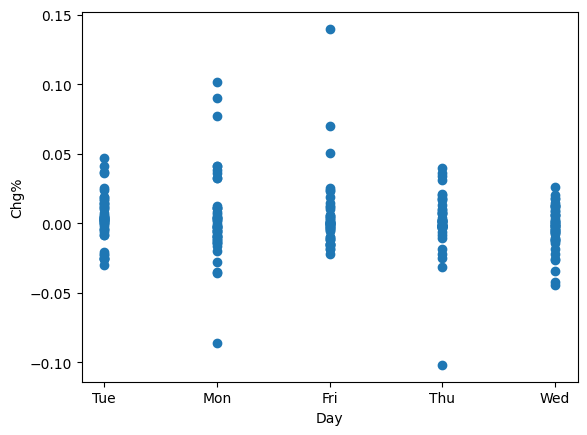

In [ ]:
df = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")
price = df.iloc[:,3].dropna()

# Mean and Variance
print("Mean:", np.mean(price))
print("Variance:", np.var(price))

# Custom Mean and Variance
custom_mean = sum(price)/len(price)
custom_variance = sum((price-custom_mean)**2)/len(price)

print("Custom Mean:", custom_mean)
print("Custom Variance:", custom_variance)

# Wednesday Mean
wed = df[df["Day"]=="Wednesday"].iloc[:,3]
print("Wednesday Mean:", wed.mean())

# April Mean
df["Date"] = pd.to_datetime(df["Date"])
april = df[df["Date"].dt.month == 4].iloc[:,3]
print("April Mean:", april.mean())

# Loss Probability
chg = df["Chg%"]
loss_prob = len(list(filter(lambda x: x<0, chg))) / len(chg)
print("Loss Probability:", loss_prob)

# Scatter Plot
plt.scatter(df["Day"], chg)
plt.xlabel("Day")
plt.ylabel("Chg%")
plt.show()


In [ ]:
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

In [ ]:
binary_df = df.select_dtypes(include='number').iloc[:2]

v1 = binary_df.iloc[0].values
v2 = binary_df.iloc[1].values

f11 = np.sum((v1==1) & (v2==1))
f00 = np.sum((v1==0) & (v2==0))
f10 = np.sum((v1==1) & (v2==0))
f01 = np.sum((v1==0) & (v2==1))

jc = f11 / (f01 + f10 + f11)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Coefficient:", jc)
print("Simple Matching Coefficient:", smc)


Jaccard Coefficient: nan
Simple Matching Coefficient: nan


/tmp/ipython-input-386283109.py:11: RuntimeWarning: invalid value encountered in scalar divide
  jc = f11 / (f01 + f10 + f11)
/tmp/ipython-input-386283109.py:12: RuntimeWarning: invalid value encountered in scalar divide
  smc = (f11 + f00) / (f00 + f01 + f10 + f11)


In [ ]:
numeric_df = df.select_dtypes(include='number')

v1 = numeric_df.iloc[0].values.reshape(1,-1)
v2 = numeric_df.iloc[1].values.reshape(1,-1)

similarity = cosine_similarity(v1, v2)
print("Cosine Similarity:", similarity)


Cosine Similarity: [[1.]]


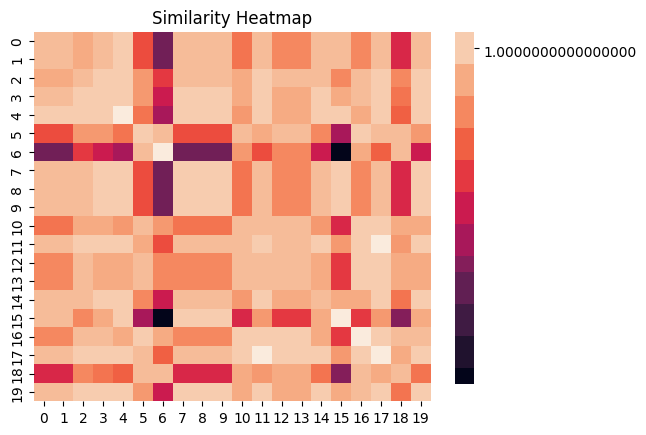

In [ ]:
data_20 = numeric_df.iloc[:20]
sim_matrix = cosine_similarity(data_20)

sns.heatmap(sim_matrix)
plt.title("Similarity Heatmap")
plt.show()


In [ ]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())


/tmp/ipython-input-3645757386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3645757386.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Missing values after imputation:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

In [ ]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns

df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.head())


      Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00  0.000427   F            f                  f   
1  3.410871e-08  0.000427   F            f                  f   
2  9.891527e-07  0.000610   F            f                  f   
3  6.934301e-05  0.000534   F            f                  f   
4  6.937712e-05  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            